In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class spline_cub(object):
    def __init__(self, x, y):
        self.x = np.asarray(x, dtype=float)
        self.y = np.asarray(y, dtype=float)
        
        n = len(x) - 1
        self.n = n
        A = np.zeros((n, n))
        h = np.zeros(n+1)
        for i in range(1,n+1):
            h[i] = x[i] - x[i-1]
        self.h = np.asarray(h, dtype=float)
        
        
        for i in range(2,n):
            A[i-1, i-2] = h[i]
            A[i-1, i-1] = 2 * (h[i+1] + h[i])
            A[i-1, i ] = h[i+1]
        A[0, 0] = 2*(h[2] + h[1])
        A[0, 1] = h[2]
        A[0, n-1] = h[1]
        A[n-1, 0] = h[1]
        A[n-1, n - 2] = h[n]
        A[n-1, n-1] = 2 * (h[n] + h[1])
        b = np.zeros(n)
        for i in range(2, n):
            b[i-1] = 3 * ((y[i+1] - y[i])/h[i+1] - (y[i] - y[i-1]/h[i]))
        b[0] = 3 * ((y[1] - y[0])/h[1] - (y[0] - y[n])/h[n])
        b[n-1] = 3 * ((y[1] - y[n])/h[1] - (y[n] - y[n-1])/h[n])
        self.res = np.linalg.solve(A, b)
        C = np.zeros((n, n))
        C[0, 0] = self.y[1]
        C[1, 0] = h[1] * (2 * self.res[0] + self.res[n-1])/3 + (C[0, 0] - self.y[0])/h[1] 
        C[2, 0] = self.res[0]
        C[3, 0] = (self.res[0] - self.res[n-1])/(3 * h[1])
        for i in range(1,n-1):
            C[0, i] = y[i+1]
            C[1, i] = h[i+1] * (2 * self.res[i] + self.res[i-1])/3 + (C[0, i] - y[i])/h[i+1] 
            C[2, i] = self.res[i]
            C[3, i] = (self.res[i] - self.res[i-1])/(3 * h[i+1])
        C[0, n-1] = y[n]
        C[1, n-1] = h[n] * (2 * self.res[n-1] + self.res[n-2])/3 + (C[0, n-1] - y[n-1])/h[n] 
        C[2, n-1] = self.res[n-1]
        C[3, n-1] = (self.res[n-1] - self.res[n-2])/(3 * h[n])
        self.C = np.asarray(C, dtype=float)
        
        
    def __call__(self, x0):
        for i in range(0, self.n):
            if x0 >= self.x[i] and x0 < self.x[i + 1]:
                return self.C[0, i] + self.C[1, i] * (x0-self.x[i+1]) + self.C[2, i] * (x0-self.x[i+1])**2 + self.C[3, i] * (x0-self.x[i+1])**3

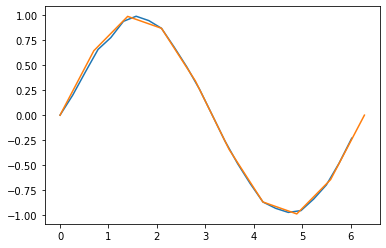

In [21]:
xx = np.linspace(0, 2 * np.pi, 10)
yy = np.sin(xx)
k = spline_cub(xx, yy)
a = np.linspace(0, 2*np.pi, 25)
b = np.zeros(25)
for i in range(25):
    b[i] = k(a[i])
plt.plot(a, b)
plt.plot(xx, np.sin(xx))
plt.show()

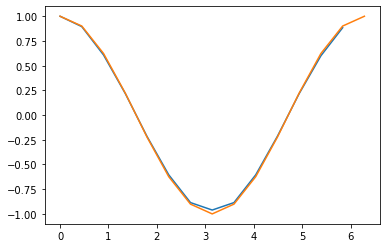

In [23]:
xx = np.linspace(0, 2 * np.pi, 10)
yy = np.cos(xx)
k = spline_cub(xx, yy)
a = np.linspace(0, 2*np.pi, 15)
b = np.zeros(15)
for i in range(15):
    b[i] = k(a[i])
plt.plot(a, b)
plt.plot(a, np.cos(a))
plt.show()